In [5]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
file_path = '/content/drive/MyDrive/NLP-HW1/presidential_speeches/presidential_speeches.csv'
df = pd.read_csv(file_path)

In [7]:
number_of_speech_per_president = 7

In [8]:
df.head()

,Date,President,Party,Speech Title,Summary,Transcript,URL
0,1789-04-30,George Washington,Unaffiliated,First Inaugural Address,Washington calls on Congress to avoid local an...,Fellow Citizens of the Senate and the House of...,https://millercenter.org/the-presidency/presid...
1,1789-10-03,George Washington,Unaffiliated,Thanksgiving Proclamation,"At the request of Congress, Washington establi...",Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...
2,1790-01-08,George Washington,Unaffiliated,First Annual Message to Congress,"In a wide ranging speech, President Washington...",Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
3,1790-12-08,George Washington,Unaffiliated,Second Annual Message to Congress,Washington focuses on commerce in his second a...,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...
4,1790-12-29,George Washington,Unaffiliated,Talk to the Chiefs and Counselors of the Senec...,The President reassures the Seneca Nation that...,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...


In [9]:
df.describe()

,Date,President,Party,Speech Title,Summary,Transcript,URL
count,992,992,992,992,687,991,992
unique,970,44,6,716,687,987,992
top,1920-07-22,Lyndon B. Johnson,Democratic,State of the Union Address,Washington calls on Congress to avoid local an...,To the Senate and House of Representatives: In...,https://millercenter.org/the-presidency/presid...
freq,5,71,478,42,1,2,1


In [10]:
df1=df.drop(['Party','URL','Speech Title','Summary'],axis=1)

In [17]:
speaker_counts = df1['President'].value_counts()
speakers_with_at_least_10_speeches = speaker_counts[speaker_counts >= 10]
df_filtered = df1[df1['President'].isin(speakers_with_at_least_10_speeches.index)]
df_filtered["President"].value_counts()
df_filtered = df_filtered.groupby('President').head(number_of_speech_per_president)
df_filtered['President'].value_counts()


George Washington        7
William Taft             7
Warren G. Harding        7
Calvin Coolidge          7
Herbert Hoover           7
Franklin D. Roosevelt    7
Harry S. Truman          7
Richard M. Nixon         7
John F. Kennedy          7
Lyndon B. Johnson        7
Ronald Reagan            7
Gerald Ford              7
Jimmy Carter             7
George H. W. Bush        7
Bill Clinton             7
George W. Bush           7
Barack Obama             7
Woodrow Wilson           7
Theodore Roosevelt       7
Thomas Jefferson         7
William McKinley         7
James Madison            7
James Monroe             7
Andrew Jackson           7
Martin Van Buren         7
John Tyler               7
James K. Polk            7
Abraham Lincoln          7
Franklin Pierce          7
James Buchanan           7
Andrew Johnson           7
Ulysses S. Grant         7
Rutherford B. Hayes      7
Chester A. Arthur        7
Grover Cleveland         7
Benjamin Harrison        7
Donald Trump             7
N

In [18]:
df_filtered=df_filtered.dropna(axis=0).reset_index(drop=True)

In [19]:
file_path = '/content/drive/MyDrive/NLP-HW1/us_2020_election_speeches/us_2020_election_speeches.csv'
df_new_data = pd.read_csv(file_path)

In [20]:
df_new_data.head()

,speaker,title,text,date,location,type
0,David Perdue,Georgia Sen. David Perdue Speech Transcript at...,David Perdue: (00:01)\nHow great is it to be b...,"Oct 16, 2020","Macon, Georgia",Campaign Speech
1,Joe Biden,"Joe Biden Southfield, MI Speech on Health Care...","Joe Biden: (00:00)\nHello, Michigan. Hi, how a...","Oct 16, 2020","Southfield ,Michigan",Campaign Speech
2,Donald Trump,Donald Trump Speech Transcript ‘Protecting Ame...,President Trump: (00:30)\nThank you. What a ni...,"Oct 16, 2020","Fort Myers, Florida",Campaign Speech
3,Joe Biden,Joe Biden ABC Town Hall Transcript October 15,"George Stephanopoulos: (00:41)\nHey, and welco...","Oct 15, 2020",ABC,Town Hall
4,Donald Trump,Donald Trump NBC Town Hall Transcript October 15,Savannah Guthrie: (03:50)\nIt’s nothing but no...,"Oct 15, 2020",NBC,Town Hall


In [21]:
df_new_data=df_new_data.drop(['title','location','type'],axis=1)
df_new_data=df_new_data.dropna(axis=0).reset_index(drop=True)

In [22]:
df_new_data.head()

,speaker,text,date
0,David Perdue,David Perdue: (00:01)\nHow great is it to be b...,"Oct 16, 2020"
1,Joe Biden,"Joe Biden: (00:00)\nHello, Michigan. Hi, how a...","Oct 16, 2020"
2,Donald Trump,President Trump: (00:30)\nThank you. What a ni...,"Oct 16, 2020"
3,Joe Biden,"George Stephanopoulos: (00:41)\nHey, and welco...","Oct 15, 2020"
4,Donald Trump,Savannah Guthrie: (03:50)\nIt’s nothing but no...,"Oct 15, 2020"


In [23]:
joe_biden_data = df_new_data[df_new_data['speaker'] == 'Joe Biden'].sample(n=30, random_state=42)
joe_biden_data = joe_biden_data.rename(columns={'speaker': 'President', 'text':'Transcript', 'date':'Date'})
# Add the extracted rows to the existing DataFrame df
concated_df = pd.concat([df_filtered, joe_biden_data], ignore_index=True)


In [24]:
concated_df.to_csv('/content/drive/MyDrive/NLP-HW1/presidential_speeches/filtered1.csv', index=False)
import os

# Get the size of the CSV file in bytes
file_size_bytes = os.path.getsize('/content/drive/MyDrive/NLP-HW1/presidential_speeches/filtered1.csv')

# Convert bytes to megabytes
file_size_mb = file_size_bytes / (1024 * 1024)

print("Size of the CSV file:", file_size_mb, "MB")


Size of the CSV file: 6.025282859802246 MB


In [26]:
file_path = '/content/drive/MyDrive/NLP-HW1/presidential_speeches/filtered.csv'
df = pd.read_csv(file_path)

In [27]:
df.head()

,Date,President,Transcript
0,1789-04-30,George Washington,Fellow Citizens of the Senate and the House of...
1,1789-10-03,George Washington,Whereas it is the duty of all Nations to ackno...
2,1790-01-08,George Washington,Fellow Citizens of the Senate and House of Rep...
3,1790-12-08,George Washington,Fellow citizens of the Senate and House of Rep...
4,1790-12-29,George Washington,"I the President of the United States, by my ow..."


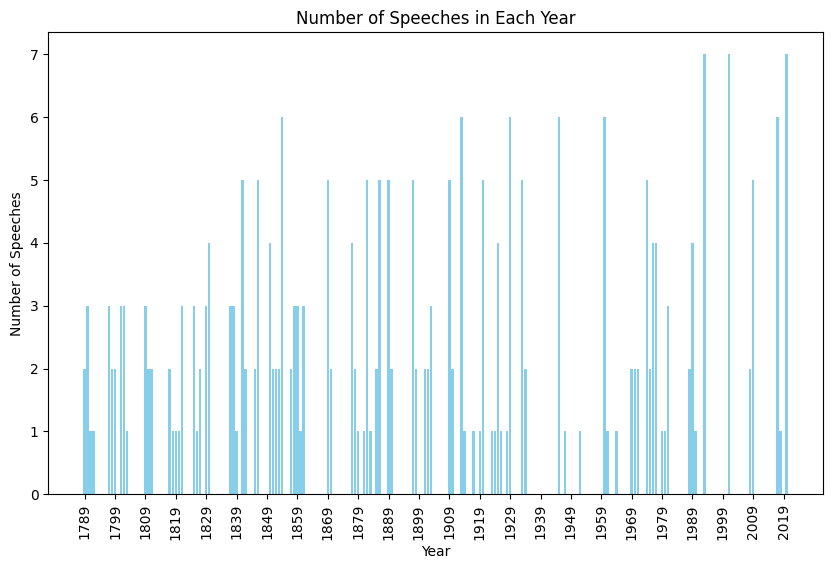

In [28]:

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])
# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Count the number of speeches in each year
speeches_per_year = df['Date'].dt.year.value_counts().sort_index()

# Plot the number of speeches in each year
plt.figure(figsize=(10, 6))
plt.bar(speeches_per_year.index, speeches_per_year, color='skyblue')
plt.title('Number of Speeches in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=90)
# Set x-axis ticks every 20 years
plt.xticks(range(min(df['Year']), max(df['Year']) + 1, 10))
plt.show()

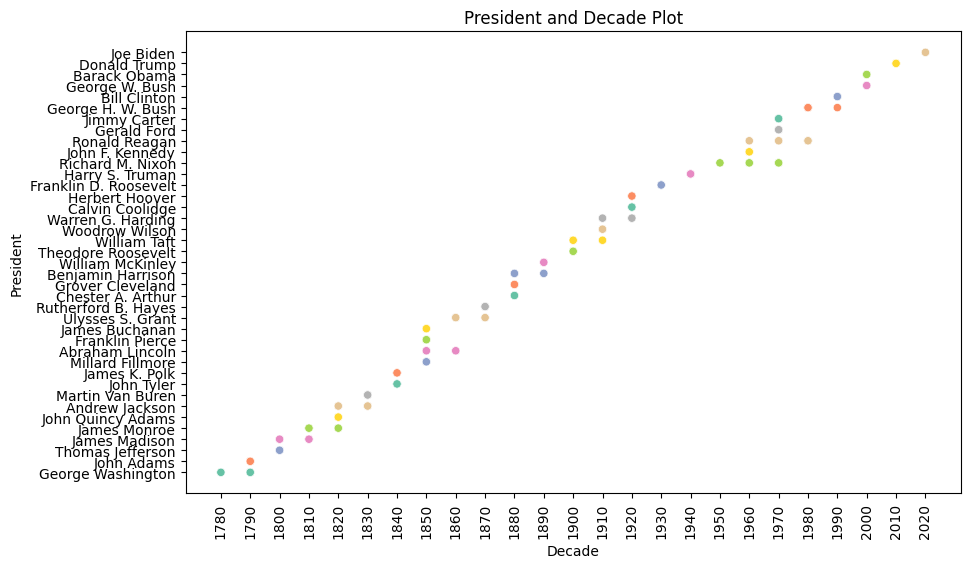

In [30]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract decade from 'Date' column
df['Decade'] = (df['Date'].dt.year // 10) * 10

# Assign numerical values to presidents based on their order in the dataset
president_order = {president: i for i, president in enumerate(df['President'].unique())}
df['President_Num'] = df['President'].map(president_order)

# Plot: President and Decade plot
plt.figure(figsize=(10, 6))

# Plot scatterplot with decade
sns.scatterplot(data=df, x='Decade', y='President_Num', hue='President', palette='Set2', legend=False)
plt.title('President and Decade Plot')
plt.xlabel('Decade')
plt.ylabel('President')

# Set x-axis ticks every decade
plt.xticks(range(df['Decade'].min(), df['Decade'].max() + 1, 10))
plt.xticks(rotation=90)

# Set y-axis ticks to match presidents
plt.yticks(ticks=range(len(df['President'].unique())), labels=df['President'].unique())

plt.show()

In [38]:
df=df.drop(['Year','President_Num'],axis=1)

## Preprocess

In [41]:
import random
import tqdm
import nltk, re
from nltk.corpus import brown
from nltk import word_tokenize
import string
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string


In [73]:
nltk.download(['stopwords', 'punkt', 'vader_lexicon'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [61]:
import re

def remove_name_timestamp(transcript):
    # Pattern to match name followed by timestamp
    pattern = r'\b[A-Z][a-zA-Z\s]+:\s\(\d{2}:\d{2}\)'
    # Remove matching patterns
    cleaned_transcript = re.sub(pattern, '', transcript)
    # Remove "\n" and text between square brackets
    cleaned_transcript = re.sub(r'\n|\[.*?\]', '', cleaned_transcript)
    # Remove punctuation such as " and '
    cleaned_transcript = re.sub(r'[\'"“”’]', '', cleaned_transcript)
    return cleaned_transcript


In [62]:
df['Normalized_Transcript'] = df['Transcript'].apply(remove_name_timestamp)
joe_biden_rows = df[df['President'] == 'Joe Biden']
joe_biden_rows.head()

,Date,President,Transcript,Decade,Normalized_Transcript,Tokenized_Transcript
266,2020-09-20,Joe Biden,Joe Biden: (03:43)\nWelcome to the nation’s Co...,2020,Welcome to the nations Constitution Center. I ...,"[joe, biden, 0343, welcome, nation, ’, s, cons..."
267,2020-10-16,Joe Biden,"Joe Biden: (00:00)\nHello, Michigan. Hi, how a...",2020,"Hello, Michigan. Hi, how are you? Whats your n...","[joe, biden, 0000, hello, michigan, hi, you, w..."
268,2020-06-17,Joe Biden,"Joe Biden: (00:00)\nWell, thank you, thank you...",2020,"Well, thank you, thank you, thank you, thank y...","[joe, biden, 0000, well, thank, you, thank, yo..."
269,2020-10-12,Joe Biden,Vice President Joe Biden: (00:00)\nIt’s good t...,2020,Its good to be back. Thank you. Thank you. Its...,"[vice, president, joe, biden, 0000, it, ’, s, ..."
270,2020-05-07,Joe Biden,Joe Biden: (00:00)\n… in [inaudible 00:00:01]....,2020,… in . It really is an honor for me to have th...,"[joe, biden, 0000, …, inaudible, 000001, reall..."


In [66]:

# Initialize PorterStemmer and WordNetLemmatizer
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_transcript(transcript, stopwords_domain=[], stopword_removal=True, punctuation_removal=True, lower_case=True, minimum_length=1):
    # Remove stopwords in English and also the given domain stopwords
    if stopword_removal:
        stopwords = set(nltk.corpus.stopwords.words('english') + stopwords_domain)
        transcript = ' '.join([word for word in transcript.split() if word.lower() not in stopwords])

    # Remove punctuations
    if punctuation_removal:
        transcript = transcript.translate(str.maketrans('', '', string.punctuation))

    # Convert everything to lowercase and filter based on a minimum length
    if lower_case:
        transcript = transcript.lower()
    return transcript

def tokenize_transcript(transcript):
    # Tokenize transcript using NLTK tokenizer
    tokenized_sents = nltk.word_tokenize(transcript)

    return tokenized_sents

# Function for stemming
def stem_text(tokens):
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return stemmed_tokens

# Function for lemmatization
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in tokens]
    return lemmatized_tokens

# Apply stemming and lemmatization to each row in the 'Normalized_Transcript' column
# df['Normalized_Transcript'] = df['Normalized_Transcript'].apply(stem_text).apply(lemmatize_text)

# Apply normalization to each row in the 'Transcript' column
df['Normalized_Transcript'] = df['Normalized_Transcript'].apply(normalize_transcript, stopwords_domain=["us", "them", "upon", "shall", "it", "may", "must", "would", "one", "im", "mr"])
df['Tokenized_Transcript'] = df['Normalized_Transcript'].apply(tokenize_transcript)

In [64]:
df.head()

,Date,President,Transcript,Decade,Normalized_Transcript,Tokenized_Transcript
0,1789-04-30,George Washington,Fellow Citizens of the Senate and the House of...,1780,fellow citizens senate house representatives a...,"[fellow, citizens, senate, house, representati..."
1,1789-10-03,George Washington,Whereas it is the duty of all Nations to ackno...,1780,whereas duty nations acknowledge providence al...,"[whereas, duty, nations, acknowledge, providen..."
2,1790-01-08,George Washington,Fellow Citizens of the Senate and House of Rep...,1790,fellow citizens senate house representatives e...,"[fellow, citizens, senate, house, representati..."
3,1790-12-08,George Washington,Fellow citizens of the Senate and House of Rep...,1790,fellow citizens senate house representatives m...,"[fellow, citizens, senate, house, representati..."
4,1790-12-29,George Washington,"I the President of the United States, by my ow...",1790,president united states mouth written speech s...,"[president, united, states, mouth, written, sp..."


# frequency

In [65]:
# Function to find most frequent tokens for each president
def most_frequent_tokens(tokens):
    # Count the frequency of each token
    token_counts = Counter(tokens)
    # Return the most common tokens
    return token_counts.most_common(6)  # Change 3 to any desired number of top tokens

# Group by president and find most frequent tokens for each president
frequent_tokens_per_president = df.groupby('President')['Tokenized_Transcript'].sum().apply(most_frequent_tokens)
with pd.option_context('display.max_colwidth', None):
    display(frequent_tokens_per_president)

President
Abraham Lincoln                        [(slavery, 389), (it, 328), (government, 232), (states, 231), (one, 221), (would, 219)]
Andrew Jackson                       [(states, 188), (government, 179), (may, 141), (would, 116), (united, 102), (public, 94)]
Barack Obama                                  [(america, 70), (new, 70), (american, 63), (people, 60), (time, 55), (know, 53)]
Benjamin Harrison                     [(states, 142), (government, 110), (people, 103), (congress, 97), (made, 88), (law, 85)]
Bill Clinton                                 [(people, 143), (new, 69), (american, 67), (country, 65), (must, 63), (work, 61)]
Calvin Coolidge                     [(government, 198), (great, 129), (people, 121), (made, 117), (country, 113), (must, 112)]
Chester A. Arthur                    [(states, 117), (congress, 115), (government, 107), (united, 96), (may, 84), (would, 69)]
Donald Trump                          [(people, 158), (american, 121), (america, 115), (united, 94), 

In [69]:
# Tokenize the text data
tokenized_text = df['Tokenized_Transcript']

# Count the frequency of each token
token_counts = Counter(token for sublist in tokenized_text for token in sublist)

# Find the most frequent tokens overall
most_common_tokens = token_counts.most_common(10)
print("Most frequent tokens overall:")
print(most_common_tokens)

# Most frequent tokens per decade
most_common_tokens_per_year = {}
for year, group in df.groupby('Decade'):
    tokenized_text_year = group['Tokenized_Transcript']
    token_counts_year = Counter(token for sublist in tokenized_text_year for token in sublist)
    most_common_tokens_per_year[year] = token_counts_year.most_common(5)  # Adjust number of tokens as needed

print("\nMost frequent tokens per decade:")
for year, tokens in most_common_tokens_per_year.items():
    print(f"Year {year}: {tokens}")

# Most frequent tokens per party
most_common_tokens_per_party = {}
for party, group in df.groupby('Party'):
    tokenized_text_year = group['Tokenized_Transcript']
    token_counts_year = Counter(token for sublist in tokenized_text_year for token in sublist)
    most_common_tokens_per_party[party] = token_counts_year.most_common(5)  # Adjust number of tokens as needed

print("\nMost frequent tokens per party:")
for party, tokens in most_common_tokens_per_party.items():
    print(f"Year {party}: {tokens}")

Most frequent tokens overall:
[('government', 3909), ('states', 3767), ('people', 2872), ('united', 2862), ('would', 2538), ('congress', 2307), ('country', 2185), ('great', 1890), ('one', 1861), ('made', 1645)]

Most frequent tokens per decade:
Year 1780: [('government', 13), ('every', 9), ('people', 9), ('public', 8), ('great', 7)]
Year 1790: [('states', 137), ('united', 120), ('government', 71), ('country', 51), ('people', 49)]
Year 1800: [('public', 39), ('states', 35), ('government', 33), ('citizens', 30), ('would', 30)]
Year 1810: [('states', 142), ('united', 122), ('government', 110), ('great', 75), ('spain', 63)]
Year 1820: [('states', 267), ('united', 225), ('government', 191), ('congress', 157), ('would', 142)]
Year 1830: [('government', 349), ('states', 321), ('public', 216), ('united', 193), ('would', 185)]
Year 1840: [('states', 291), ('government', 287), ('united', 186), ('congress', 180), ('public', 159)]
Year 1850: [('states', 822), ('government', 583), ('united', 505), 

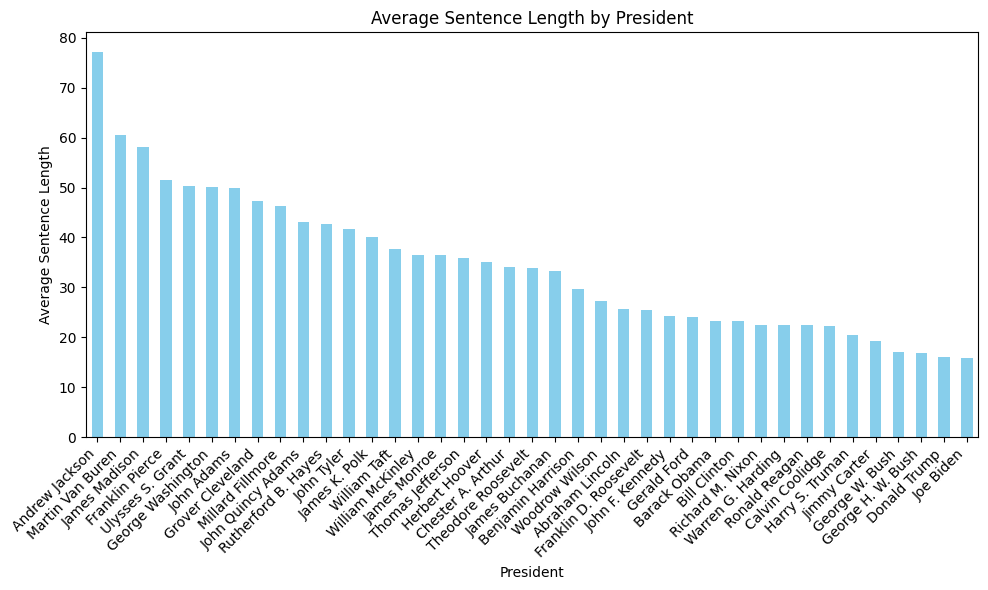

In [75]:
import matplotlib.pyplot as plt
import nltk

# Function to calculate average sentence length
def average_sentence_length(text):
    # Tokenize text into sentences
    sentences = nltk.sent_tokenize(text)
    # Calculate the length of each sentence and return the average
    if sentences:
        return sum(len(sentence.split()) for sentence in sentences) / len(sentences)
    else:
        return 0  # Handle cases where there are no sentences

# Calculate the average sentence length for each speech
df['Average_Sentence_Length'] = df['Transcript'].apply(average_sentence_length)

# Calculate the average sentence length for each president
average_sentence_length_per_president = df.groupby('President')['Average_Sentence_Length'].mean().sort_values(ascending=False)

# Plot the average sentence length for each president
plt.figure(figsize=(10, 6))
average_sentence_length_per_president.plot(kind='bar', color='skyblue')
plt.title('Average Sentence Length by President')
plt.xlabel('President')
plt.ylabel('Average Sentence Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


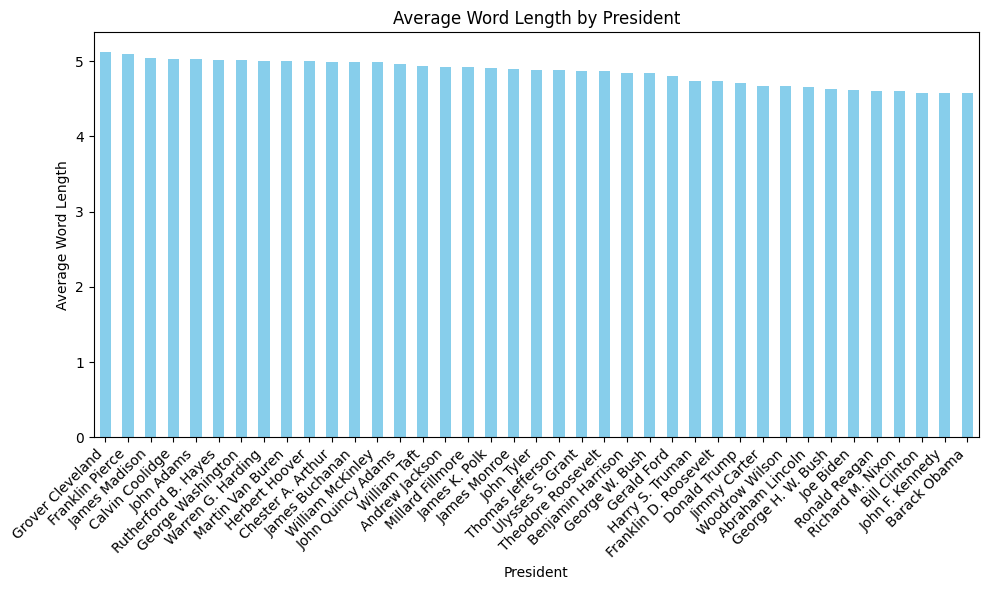

In [76]:
import matplotlib.pyplot as plt

# Function to calculate average word length
def average_word_length(text):
    words = text.split()  # Tokenize text into words
    word_lengths = [len(word) for word in words]  # Calculate length of each word
    if word_lengths:
        return sum(word_lengths) / len(word_lengths)  # Calculate average word length
    else:
        return 0  # Handle cases where there are no words

# Calculate the average word length for each speech
df['Average_Word_Length'] = df['Transcript'].apply(average_word_length)

# Calculate the average word length for each president
average_word_length_per_president = df.groupby('President')['Average_Word_Length'].mean().sort_values(ascending=False)

# Plot the average word length for each president
plt.figure(figsize=(10, 6))
average_word_length_per_president.plot(kind='bar', color='skyblue')
plt.title('Average Word Length by President')
plt.xlabel('President')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


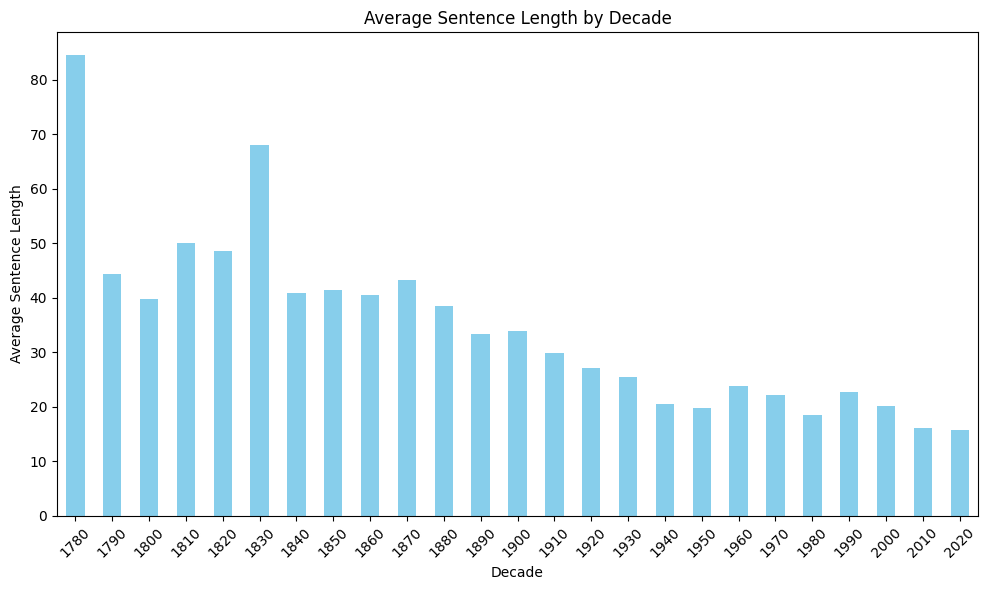

In [78]:
import matplotlib.pyplot as plt
import nltk

# Function to calculate average sentence length
def average_sentence_length(text):
    sentences = nltk.sent_tokenize(text)  # Tokenize text into sentences
    if sentences:
        return sum(len(sentence.split()) for sentence in sentences) / len(sentences)  # Calculate average sentence length
    else:
        return 0  # Handle cases where there are no sentences


# Calculate the average sentence length for each decade
average_sentence_length_per_decade = df.groupby('Decade')['Average_Sentence_Length'].mean()

# Plot the average sentence length for each decade
plt.figure(figsize=(10, 6))
average_sentence_length_per_decade.plot(kind='bar', color='skyblue')
plt.title('Average Sentence Length by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Sentence Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


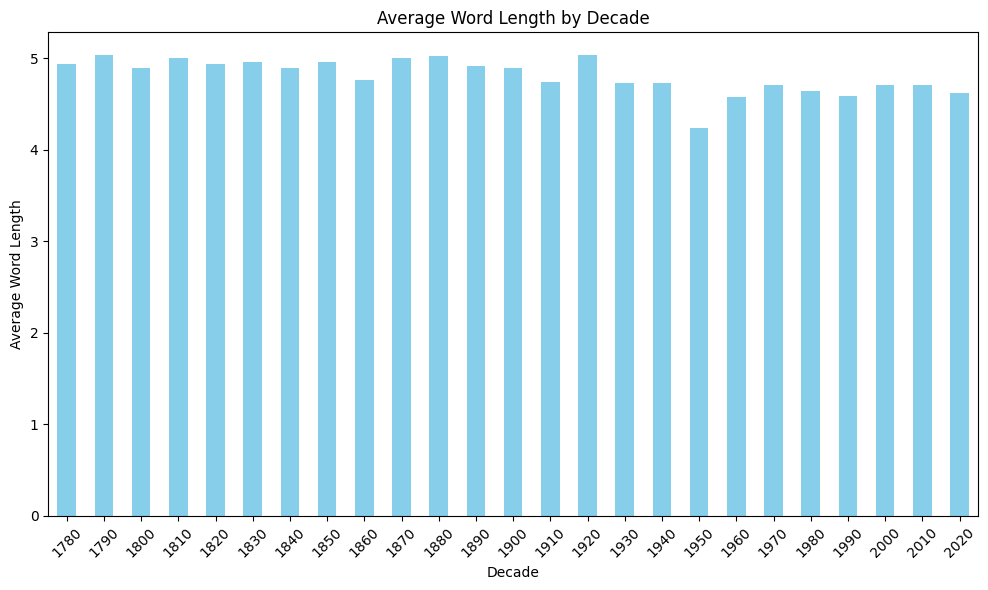

In [82]:
import matplotlib.pyplot as plt

# Function to calculate average word length
def average_word_length(text):
    words = text.split()  # Tokenize text into words
    word_lengths = [len(word) for word in words]  # Calculate length of each word
    if word_lengths:
        return sum(word_lengths) / len(word_lengths)  # Calculate average word length
    else:
        return 0  # Handle cases where there are no words

# Calculate the average word length for each speech
df['Average_Word_Length'] = df['Transcript'].apply(average_word_length)

# Calculate the average word length for each decade
average_word_length_per_decade = df.groupby('Decade')['Average_Word_Length'].mean()

# Plot the average word length for each decade
plt.figure(figsize=(10, 6))
average_word_length_per_decade.plot(kind='bar', color='skyblue')
plt.title('Average Word Length by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Word Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-92-29ecf924b703>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[entity[0] for entity in entity_counts.most_common(10)], y=[entity[1] for entity in entity_counts.most_common(10)], palette='Set2')


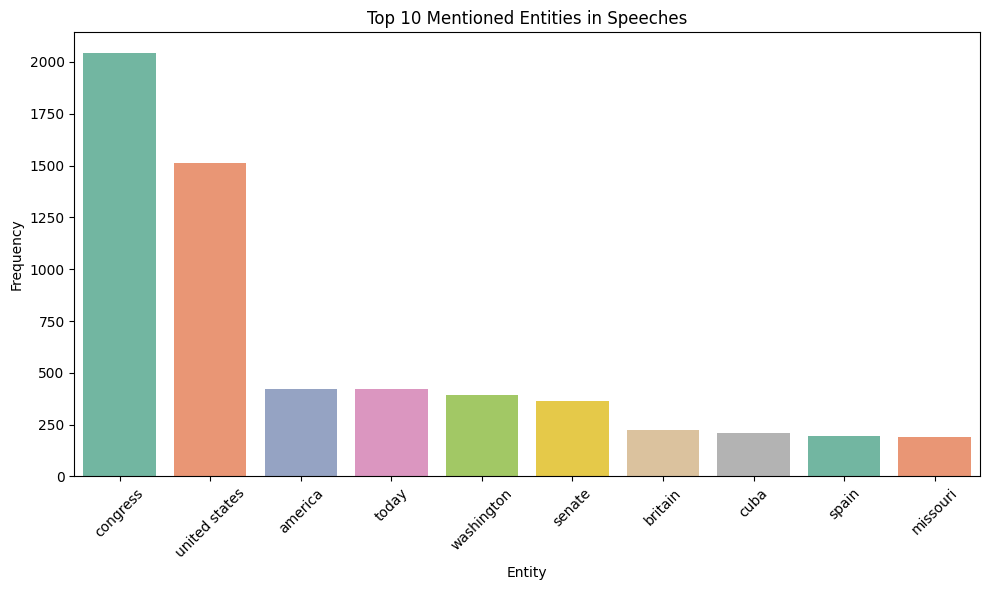

In [92]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy's English model with NER component
nlp = spacy.load("en_core_web_sm")

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents if ent.label_ in ['PERSON', 'ORG', 'GPE', 'DATE']]
    return entities

# Apply entity extraction to each speech
df['Entities'] = df['Normalized_Transcript'].apply(extract_entities)

# Flatten the list of entities
all_entities = [entity for entities in df['Entities'] for entity in entities]

# Count the occurrences of each entity
entity_counts = Counter(all_entities)

# Plot the most common entities
plt.figure(figsize=(10, 6))
sns.barplot(x=[entity[0] for entity in entity_counts.most_common(10)], y=[entity[1] for entity in entity_counts.most_common(10)], palette='Set2')
plt.title('Top 10 Mentioned Entities in Speeches')
plt.xlabel('Entity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [93]:
from collections import Counter, defaultdict
from tabulate import tabulate

# Dictionary to store the focus of each president's agenda
president_focus = defaultdict(list)

# Iterate through each row in the DataFrame
for index, row in df.iterrows():
    # Extract president's name and entities mentioned in the speech
    president = row['President']
    entities = row['Entities']

    # Add the entities mentioned in the speech to the president's focus
    president_focus[president].extend(entities)

# Create a table to store the focus of each president's agenda
agenda_table = []

# Count the occurrences of each entity for each president
for president, entities in president_focus.items():
    entity_counts = Counter(entities)
    top_entities = [f"{entity}: {count} mentions" for entity, count in entity_counts.most_common(5)]  # Top 5 most mentioned entities
    agenda_table.append([president] + top_entities)

# Print the agenda table
print(tabulate(agenda_table, headers=['President', '1st Focus', '2nd Focus', '3rd Focus', '4th Focus', '5th Focus'], tablefmt='grid'))


+-----------------------+----------------------------+-----------------------------+------------------------------------------+------------------------------+------------------------------+
| President             | 1st Focus                  | 2nd Focus                   | 3rd Focus                                | 4th Focus                    | 5th Focus                    |
+=======================+============================+=============================+==========================================+==============================+==============================+
| George Washington     | united states: 29 mentions | congress: 4 mentions        | fellow citizens senate house: 3 mentions | virginia: 2 mentions         | another year: 2 mentions     |
+-----------------------+----------------------------+-----------------------------+------------------------------------------+------------------------------+------------------------------+
| John Adams            | united states: 39 mentio

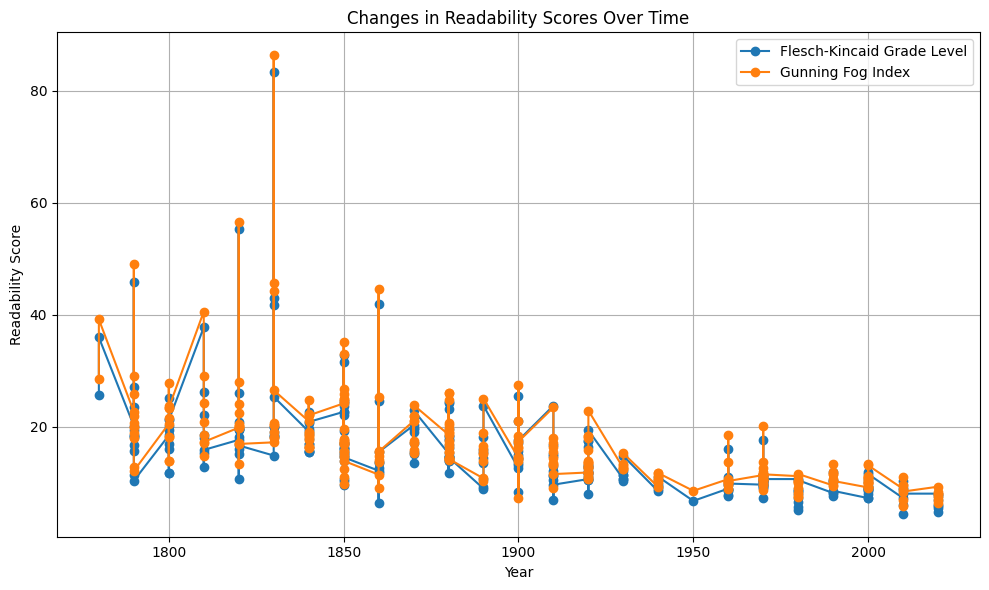

In [ ]:
import textstat

# Function to calculate readability scores
def calculate_readability(text):
    # Calculate Flesch-Kincaid Grade Level
    fk_grade = textstat.flesch_kincaid_grade(text)
    # Calculate Gunning Fog Index
    gunning_fog = textstat.gunning_fog(text)
    return fk_grade, gunning_fog

# Apply readability calculation to each speech
df['Flesch_Kincaid_Grade'], df['Gunning_Fog_Index'] = zip(*df['Transcript'].apply(calculate_readability))

# Plot changes in readability scores over time
plt.figure(figsize=(10, 6))
plt.plot(df['Decade'], df['Flesch_Kincaid_Grade'], label='Flesch-Kincaid Grade Level', marker='o')
plt.plot(df['Decade'], df['Gunning_Fog_Index'], label='Gunning Fog Index', marker='o')
plt.title('Changes in Readability Scores Over Time')
plt.xlabel('Decade')
plt.ylabel('Readability Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Calculate average readability scores for each president
average_readability = df.groupby('President').agg({'Flesch_Kincaid_Grade': 'mean', 'Gunning_Fog_Index': 'mean'}).reset_index()

# Plot readability scores for each president
plt.figure(figsize=(10, 6))
sns.barplot(data=average_readability, x='President', y='Flesch_Kincaid_Grade', color='skyblue', label='Flesch-Kincaid Grade Level')
sns.barplot(data=average_readability, x='President', y='Gunning_Fog_Index', color='salmon', label='Gunning Fog Index')
plt.title('Readability of Speeches by President')
plt.xlabel('President')
plt.ylabel('Readability Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# key phrase extraction